In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
 import matplotlib.pyplot as plt


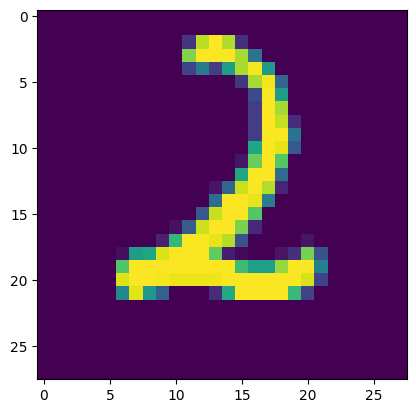

In [8]:
plt.imshow(x_train[122])

In [9]:
x_train =x_train/255
x_test = x_test/255

In [11]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

E:\Deep Learning\tf_env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

In [14]:
model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2872 - val_loss: 0.1580
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1280 - val_loss: 0.1187
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0857 - val_loss: 0.1080
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0643 - val_loss: 0.0985
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0499 - val_loss: 0.0842
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0376 - val_loss: 0.0845
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0304 - val_loss: 0.0838
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0230 - val_loss: 0.0838
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0183 - val_loss: 0.0980
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0159 - val_loss: 0.1000


In [16]:
y_prob=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step


In [22]:
y_predict=y_prob.argmax(axis=1)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test,y_predict)

0.9752